**Introduction**
* The technology and information revolution experienced in the 20th century has become the most important phenomenon in in diverse fields. A current trend that has emerged as a result of the  information technology is Machine Learning. Many individuals and institutions have been utilized to attain a wide variety of goals in many discipilnes.

* Today, the Machine Learning and their practice were decisive factors throughout our century, driving change in all areas. Many techniques are used to train the data and get the result in machine learning. The power of the machine learning have been improved for a long time. There are three main types of Machine Learning: supervised learning, unsupervised learning, and reinforcement learning.  Supervised learning is used to construct predictive models for an unknown dependency from a dataset. It is also known as “learning with a teacher”. The algorithm learns from through the observation of a set of examples. This approach will generate the output based on the given data. The provided data in supervised Learning can be of two types: a) discrete data for classification and b) continuous data for regression. 
Some learning algorithms  are widely used in the type of Supervised Learning. They are as follows: 
* •	Logistical Regression
* •	Linear regression
* •	Decision Trees
* •	Support Vector Machines (SVM)
* •	Random Forest
* •	Naive Bayes
* •	Nearest Neighbor

* Given this context, among those type of machine Learning, decision tree is an supervised learning. Decision tree is one of the simplest, the powerful and popular machine learning algorithms. Decision tree is a non-parametric method that can work for classification and regression tasks. This approach deals with categorical output problem and continuous output problems. That is to say, a classification model for the dependent variable is discrete in nature, while the dependent variable for the regression model is continuous. 


# Objective
The primary aim of this study is to classify whether mushrooms are poisonous or not based on the dataset.


![](http://)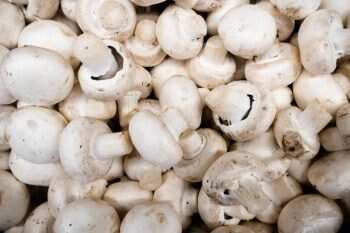

# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

# 2. LOAD DATA

In [ ]:
df1 = pd.read_csv("../input/mushroom-classification/mushrooms.csv")
df = df1.copy()
df.head()

# 3. UNDERSTANDING THE DATA-SET

# **Data Summary**
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in 
the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).
 Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.
This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for 
determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

**The variables of the dataset are the following:**

**#Dependent Variable**

classes: edible=e, poisonous=p

**#Independent Variable**
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.head(2)

In [ ]:
df.describe()

**#Checking missing values**

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In this section, first of all, categorical variables should be determined.
Which variables in the data set are categorical?

In [ ]:
df.dtypes

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))

In [ ]:
cat_cols

These are all categorical features in the dataset.

* cap-shape

In [ ]:
df["cap-shape"].value_counts()

* cap-surface

In [ ]:
df["cap-surface"].value_counts()

* cap-color

In [ ]:
df["cap-color"].value_counts()

* veil-type

In [ ]:
df["veil-type"].value_counts()

The variable "veil-type" does not give information about class. It is better to drop it.

In [ ]:
df.drop(["veil-type"],axis=1,inplace=True)

* bruises

In [ ]:
df["bruises"].value_counts()

* gill-size

In [ ]:
df["gill-size"].value_counts()

# 4. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

* Finding the number of values in the target column

In [ ]:
df["class"].value_counts()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["class"].value_counts(),  labels=['edible','poisonous'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


As seen from the values above, there is no imbalance between the classes of the dependent variable.

In [ ]:
sns.countplot("class",data=df); plt.show()


In [ ]:
df["class"].replace(["p","e"],[1,0],inplace=True)

In [ ]:
df["class"].value_counts()

#  5. LABEL ENCODING & ONE-HOT ENCODING

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
cat_cols

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns

df, new_cols_ohe = one_hot_encoder(df, cat_cols)


In [ ]:
df.head()

# 6. MODELING

**Train Test Split**

In [ ]:
X = df.drop('class', axis=1)
y = df[["class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [ ]:
vital = []
points = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=30),
          'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=1),
            'Linear SVM':SVC(kernel='rbf', gamma=.10, C=1.0)}

for a,b in models.items():
    mod = b
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(a) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    vital.append(a)
    points.append(acc)
    table = pd.DataFrame({'model':vital, 'accuracy score':points})

In [ ]:
print(table)

****All classification methods hit 100% accuracy with this dataset.